<a href="https://colab.research.google.com/github/marco-finger/DSF-FS22-MarcoFinger/blob/main/Semesterproject_documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

475186-FS2022-0-Data Science Fundamentals - for chemists and biochemists \\
Semester project: molecular dynamics (MD) with use of high performance computing (HPC) cluster

# Disclaimer


This notebook is written by

*   Daja Krummenacher (daja.krummenacher@students.unibe.ch)
*   Marco Finger (marco.finger@students.unibe.ch)

within the framework of the "Data Science Fundamentals - for chemists and biochemists" lecture, held by PD Dr. Siegve Haug and Dr. Sacha Javor in 2022 at the Departement of Chemistry, Biochemistry and Pharmacy (DCBP) at the University of Bern.

# Objectives


* Use of Linux operating systems
* Access and use of shared remote resources
* Becoming familiar with some usual graphical user interface (GUI) and command line interface (CLI) tools
* Use of high performance computing (HPC) cluster of the university (aka Ubelix) 
* Introduction to Molecular Dynamics (MD)

(adopted from respective handout, see: https://docs.google.com/document/d/1Ky5AY5DqHc9tx137D4STrElBA0yyLQ4j5_YVBlC-Nzw/edit)



# Resources and Software

## Shell


The project was entirely carried out on personal computers running Mac OS X, making additional software to work with a shell (specifically ssh) redundant, as a terminal is installed by default. One uses Bash to work in the terminal. Note that OS X is in fact a UNIX operating system. 

Using Windows, one can download the PuTTY software (https://www.putty.org/) to use ssh for working on a remote machine (i.e servers).

IMPORTANT NOTE: CONNECT VIA VPN TO UNIBE NETWORK

"To connect to the cluster, you must log in to the submit host from inside the university network (e.g. from a workstation on the campus). If you want to connect from a remote location (e.g. from your computer at home) you must first establish a VPN connection to get access to the university network."

Note: UBELX (see below) is operated remotely from your local machine using almost exclusively a command line interface (CLI). An overview on the most important termianl commands you should know is given here: 

https://cheatography.com/davechild/cheat-sheets/linux-command-line/

The most frequently used commands are listed in the table below.

__Table 1__ Some usefull UNIX commands to know by heart

| Command | Description | 
|:---------|:-------------|
| echo | echo arguments|
| pwd | return working directory|
| cd | change working directory|
| ls | lists file is current working directory|
| mkdir | makes a directory|

## FileZilla

FileZilla (https://filezilla-project.org/) is a user-friendly software for safely transfering files between local and remote computers. All actions performed with FileZilla, however, could equally be done using the terminal. One uses FileZille as it comes with a GUI, which is particularly intuitive for beginners.

## GROMACS

GROMACS is an open source software to perform molecular dynamics calculations. It is particularly suited for (large) biomolecules. Documentations are listed below:

*   https://manual.gromacs.org/documentation/current/index.html
*   https://manual.gromacs.org/documentation/current/reference-manual/index.html

In this project, GROMACS was used remotely on the Chemzilla teaching server (see below).

In case you ever need to run GROMACS locally on your Mac, this tutorial will guide to through the installation using the terminal: https://www.youtube.com/watch?v=1sNti-RMkO8

## Chemzilla Teaching Server

Chemzilla is a teaching server of the Reymond research group (https://gdb.unibe.ch). The main part of the calculation / simulation of the protein of interest was performed remotely on this server, running GROMACS already.

To connect to any server remotely, one needs to be provided with the following information by the host:

*   IP adress (e.g. 192.0.2.1)
*   Username
*   Password

Connecting to a server can be done in several ways. On UNIX operating systems, one can get access to the server by typing "ssh username@IPadress" into the terminal. Especially when it comes to moving files, it is easisiest to use FileZilla (see above).

## UBELIX Computer Cluster

The actual production run for the molecular dynamics simulation was performed on the UBELIX comupter cluster (https://ubelix.unibe.ch) at the University of Bern.

To get permission to work on UBELIX, one has to follow several steps, nicely described here: 

https://hpc-unibe-ch.github.io/getting-Started/account.html

If your request is accepted, you will be informed via email with the details on how to log in to UBELIX: 

In [ ]:
# ssh <campusaccount>@submit.unibe.ch (use this command in the terminal, see below)

## Molecular Dynamics

We use MD as a usefull blackbox-tool for simulation of molecular systems. 

In a nutshell, MD will model molecules to consist of atoms represented by mass-points that are connected via springs. The interatomic force $F$ over a distance $x$ (typically the bond length) is related to the potential $V$ as $F(x) = - \nabla V(x)$. Typically, $V$ is expressed as a Taylor series around the equilibrium bonding distance. In MD, all possible configuations of atoms (bond lengths, bond angles, torsion angles etc.) are simulated and the corresponding energy $E$ of the system is calculated, until a mimimum is found. The energy has contributions from all kinds of bonding interactions (covalent, ionic, Van der Waals etc.) for which analytical expressions are typically well-known.


A wonderfull introduction on molecular dynamics (and computational chemistry in general) can be found on youtube: https://www.youtube.com/c/TMPChem/playlists

## Protein Database


Protein structures can be downloaded from the RSCB protein database (https://www.rcsb.org/) in the format of a .pdb file.

## Molecule Viewer

Molecular structures can be visualized using a molecular viewer such as PyMol (https://pymol.org/2/).

# Tutorial 1

Tutorial 1 on how to use GROMACS was performed remotely on the Chemzilla server according to procedures described here: http://www.mdtutorials.com/gmx/lysozyme/index.html. 

In the following, a brief summary of the manipulations will be given and the main results will be highlighted.

Instead of lysozyme, the tutorial was carried out on HIV triple mutant protease complexed with hinhibitor SB203386 (RCSB code: 1tcx, DOI: 10.2210/pdb1tcx/pdb). The pre-cleaned structure was made available by S. Javor. The procedures, however, are identical.

Collected data was visualized using Python 3 as implemented in Google Colab.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Protein Structure

Picture of the pre-cleaned HIV triple mutant protease structure, prior to MD calculations. Provided by PyMol.

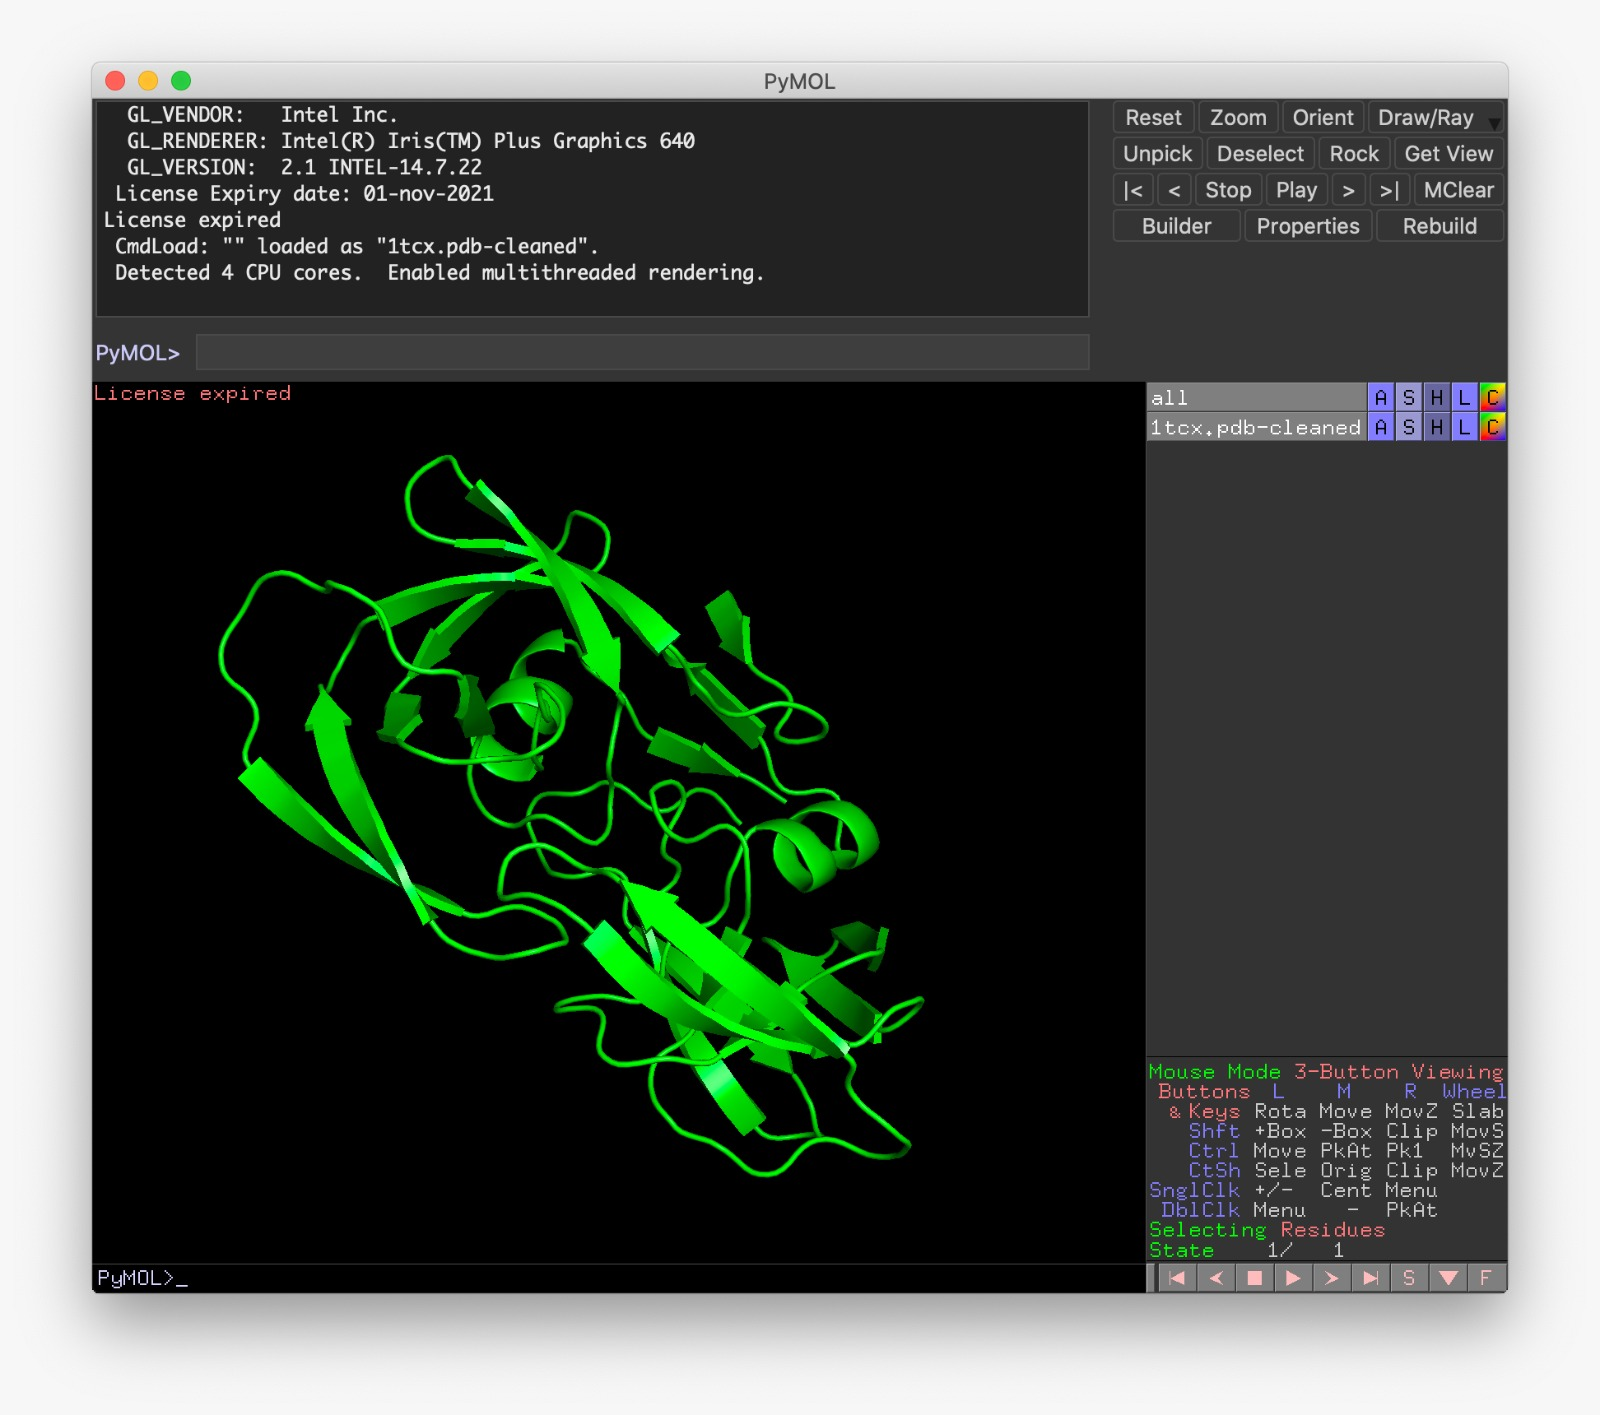

## Energy Optimization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/DSF-FS22/project/potential_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


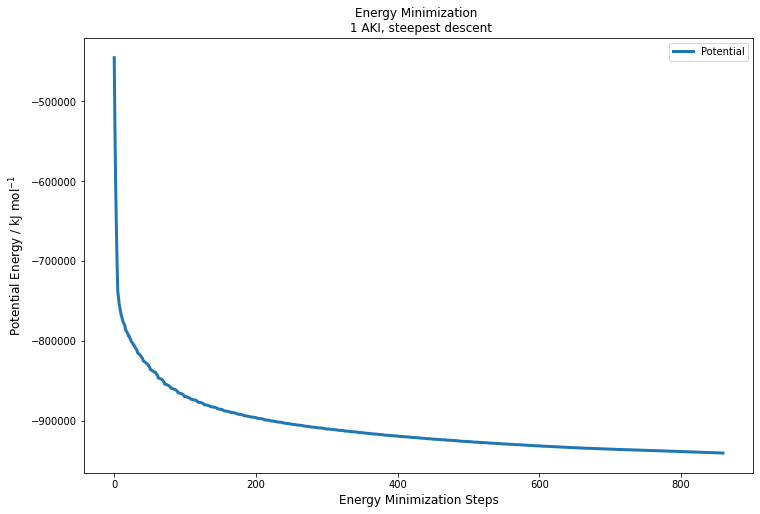

In [ ]:
df = pd.read_csv(path, delimiter = ";", header = 0) 

x = df.iloc[:,0]
y = df.iloc[:,1]

plt.figure(figsize = (12,8))
plt.plot(x,y, label = 'Potential', lw = 3)
plt.xlabel('Energy Minimization Steps', size = 12) 
plt.ylabel('Potential Energy / kJ mol$^{-1}$', size = 12)
plt.legend()
plt.title('Energy Minimization \n 1 AKI, steepest descent')
plt.savefig('/content/drive/MyDrive/DSF-FS22/project/potential_plot.png', dpi = 300)

## Temperature Equilibration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path1 = '/content/drive/MyDrive/DSF-FS22/project/temperature_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


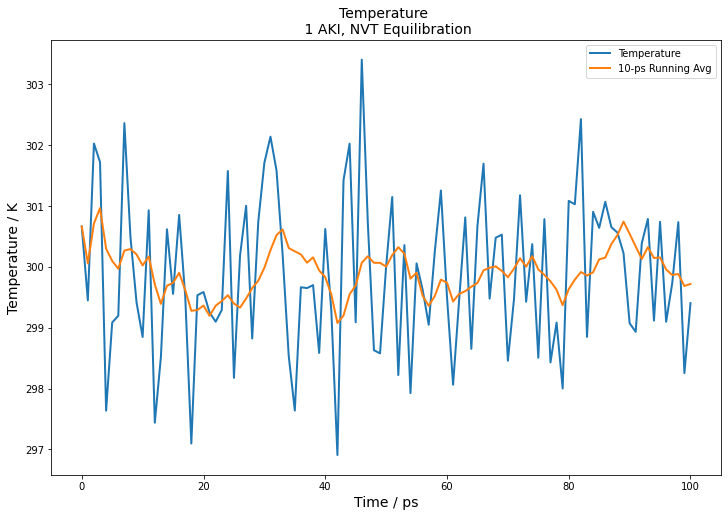

In [ ]:
df1 = pd.read_csv(path1, delimiter = ";", header = 0) 

x = df1.iloc[:,0]
y = df1.iloc[:,1]
y_mean = y.rolling(window = 10, min_periods = 1).mean()


plt.figure(figsize = (12,8))
plt.plot(x,y, label = 'Temperature', lw = 2)
plt.plot(x,y_mean, label = '10-ps Running Avg', lw = 2)
plt.xlabel('Time / ps', size = 14)
plt.ylabel('Temperature / K', size = 14) 
plt.legend()
plt.title('Temperature \n 1 AKI, NVT Equilibration', size = 14)
plt.savefig('/content/drive/MyDrive/DSF-FS22/project/temperature_plot.png', dpi = 300)

## Pressure Equilibration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path2 = '/content/drive/MyDrive/DSF-FS22/project/pressure_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


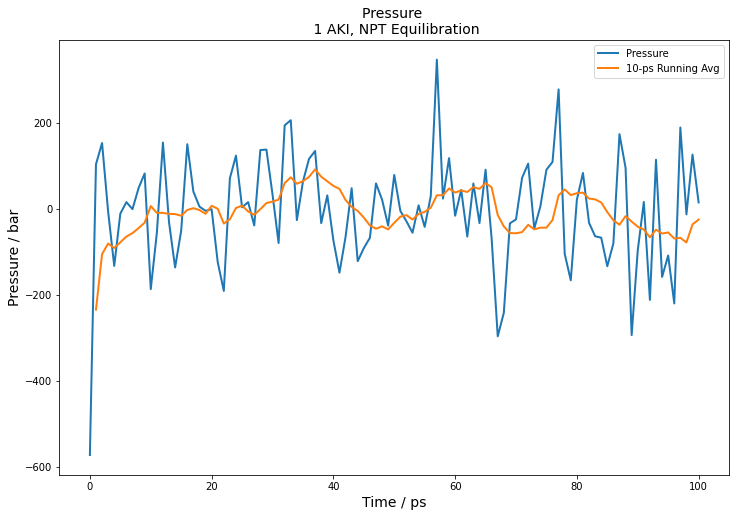

In [ ]:
df2 = pd.read_csv(path2, delimiter = ";", header = 0) 

x = df2.iloc[:,0]
y = df2.iloc[:,1]
y_mean = y.rolling(window = 10, min_periods = 2).mean()

plt.figure(figsize = (12,8))
plt.plot(x,y, label = 'Pressure', lw = 2)
plt.plot(x,y_mean, label = '10-ps Running Avg', lw = 2)
plt.xlabel('Time / ps', size = 14) 
plt.ylabel('Pressure / bar', size = 14)
plt.legend()
plt.title('Pressure \n 1 AKI, NPT Equilibration', size = 14)
plt.savefig('/content/drive/MyDrive/DSF-FS22/project/pressure_plot.png', dpi = 300)

## Density Equilibration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path3 = '/content/drive/MyDrive/DSF-FS22/project/density_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


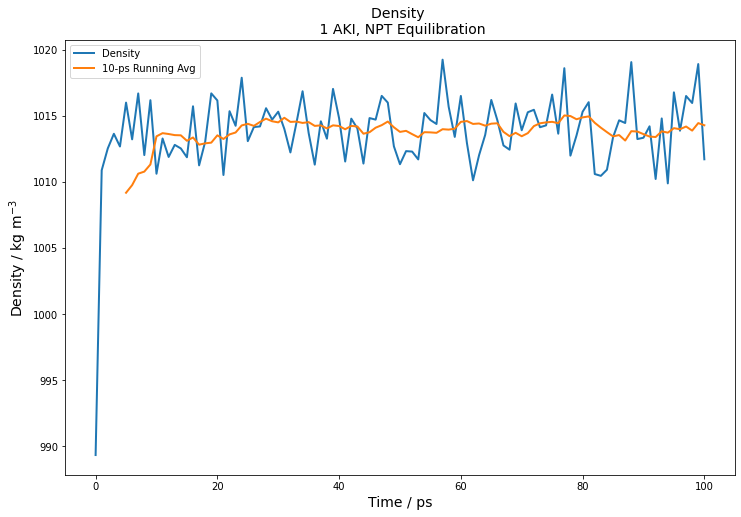

In [ ]:
df3 = pd.read_csv(path3, delimiter = ";", header = 0) 

x = df3.iloc[:,0]
y = df3.iloc[:,1]
y_mean = y.rolling(window = 10, min_periods = 6).mean()

plt.figure(figsize = (12,8))
plt.plot(x,y, label = 'Density', lw = 2)
plt.plot(x,y_mean, label = '10-ps Running Avg', lw = 2)
plt.xlabel('Time / ps', size = 14) 
plt.ylabel('Density / kg m$^{-3}$', size = 14) 
plt.legend()
plt.title('Density \n 1 AKI, NPT Equilibration', size = 14)
plt.savefig('/content/drive/MyDrive/DSF-FS22/project/density_plot.png', dpi = 300)

# UBELIX 1 - Hello World


 Job submission according to: https://hpc-unibe-ch.github.io/slurm/submission.html

## Terminal Commands

In [ ]:
# ssh <username>@submit.unibe.ch
# pwd
# mkdir DSF22
# cd DSF22
# sbatch hello_world.sh

## Job Submission Script

In [ ]:
# #!/bin/bash
# #SBATCH --job-name="Hello World"
# #SBATCH --time=00:10:00
# #SBATCH --mem-per-cpu=1M
# #your code below this line
# module load Python
# srun python3 hello_world.py

## Python Script

In [ ]:
# with open('hello_world.txt', 'w') as doc:
#   doc.write('Hello World')

## Output from UBELIX

After submission, we get the following message in the terminal: "Submitted batch job 24960948".

Files called "hello_world.txt" and "slurm-24960948" are generated in the respective folder immediately whereas the respective job was not displayed under "Running Jobs" on the UBELIX website (see: https://ubelix.unibe.ch/jobs/running).

Afterwards, the following message occurs in the terminal:
"Connection to submit.unibe.ch closed by remote host. Connection to submit.unibe.ch closed."


# UBELIX 2 - Production Run

Back to UBELIX.

To check if GROMACS was already installed on UBELIX (https://hpc-unibe-ch.github.io/software/hpc-modules.html), we typed the following:

In [ ]:
# module list

This returns a long list of modules, inculding the desired GROMACS module named "GROMACS/2020-foss-2019b".

To escape from the list, type "<esc> + :G", which brings you back to the CLI.

### Production Run - epyc2

We prepared the following .mdp file ("md_epyc2.mdp") to perform MD on the basis of the document called "DSF-MD-Prod4Ubelixmdp.sec" provided by S. Javor, and put it on UBELIX. Also, the necessary files were transferred to the server (ntp.gro; npt.cpt; topol.top).

#### Job Submission Script

The job submission file ("production_epyc2.sh") contains the following and was put on UBELIX as well. It was prepared according to: https://hpc-unibe-ch.github.io/slurm/submission.html

One has to adopt

*   Jobname
*   Time
*   Memory (we used default)
*   Partition (here: epyc2)

In [ ]:
# #!/bin/bash
# #SBATCH --job-name="Production epyc2"
# #SBATCH --time=12:00:00
# #SBATCH --mem-per-cpu=1G
# #SBATCH --partition=epyc2
# #your code below this line
# module load GROMACS/2020-foss-2019b
# srun gmx grompp -f md_epyc2.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1_epyc2.tpr
# srun gmx mdrun -deffnm md_0_1_epyc2

The job was submitted by typing the following code into the CLI:

In [ ]:
# sbatch production_epyc2.sh

In return, we got: Submitted batch job 25090596

We got the following error message: "NonZeroExitCode".

We adapted the submission file to:

In [ ]:
# #!/bin/bash
# #SBATCH --job-name="Production epyc2"
# #SBATCH --time=12:00:00
# #SBATCH --mem-per-cpu=1G
# #SBATCH --partition=epyc2
# #your code below this line
# module load GROMACS/2020-foss-2019b
# gmx grompp -f md_epyc2.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1_epyc2.tpr
# gmx mdrun -deffnm md_0_1_epyc2

Again: Submitted batch job 25091527
Then, same error message: NonZeroExitCode

Modification of Code:

In [ ]:
# #!/bin/bash
# #SBATCH --job-name="Production epyc2"
# #SBATCH --time=12:00:00
# #SBATCH --mem-per-cpu=1G
# #SBATCH --partition=epyc2
# #SBATCH --mail-user=marco.finger@students.unibe.ch
# #SBATCH --mail-type=fail,end
# #SBATCH --output=/storage/homefs/mf17l023/DSF22/MD_Production_Run
# #SBATCH --error=/storage/homefs/mf17l023/DSF22/MD_Production_Run
# #your code below this line
# module load GROMACS/2020-foss-2019b
# gmx grompp -f md_epyc2.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1_epyc2.tpr
# gmx mdrun -deffnm md_0_1_epyc2

Error file (slurm.jobID.out)

Fatal error:
Topology include file "topol_Protein_chain_A.itp" not found

The missing files were copied into the directory!

Unfortunately, now, no error or output files are generated and the code is still not executed.

Further modification: https://techglimpse.com/slurm-job-submission-stdout-stderr/

In [ ]:
# #!/bin/bash
# #SBATCH --job-name="Production epyc2"
# #SBATCH --time=48:00:00
# #SBATCH --mem-per-cpu=16G
# #SBATCH --partition=epyc2
# #SBATCH --mail-user=marco.finger@students.unibe.ch
# #SBATCH --mail-type=fail,end
# #SBATCH -o %j.output
# #SBATCH -e %j.error
# #your code below this line
# module load GROMACS/2020-foss-2019b
# gmx grompp -f md_epyc2.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1_epyc2.tpr
# gmx mdrun -deffnm md_0_1_epyc2

The code above yields at least the output and error files and creates the files of interest for MD (.tpr, .edr, .xct and .log).

However, only the .log file contains data, whereas the other ones are empty.

In the very end, we obtained the following error message, attached to the .log file:

Fatal error:
14 particles communicated to PME rank 17 are more than 2/3 times the cut-off
out of the domain decomposition cell of their charge group in dimension y.
This usually means that your system is not well equilibrated.

# Conclusion

All attepmts to do the MD production run on UBELIX where not succesfull by executing the code described above.

Most likely, the error has to do with GROMACS and/or previous manipulations during the tutorial. We resigned from further investigations, since the main task, accessing UBELIX and performing computations remotely, is considered sucessfull.